In [1]:
import pandas as pd

df = pd.read_stata('ICPSR_36404-V2/ICPSR_36404/DS0001/36404-0001-Data.dta')
print(df.head())

         ABT_INMATE_ID   SEX  \
0  A012015000000091071  Male   
1  A022015000000096906  Male   
2  A042015000000118649  Male   
3  A062015000000167469  Male   
4  A132015000000550479  Male   

                                             ADMTYPE OFFGENERAL EDUCATION  \
0                               New court commitment   Property         9   
1  Other admission (including unsentenced, transf...      Drugs         9   
2                               New court commitment    Violent         9   
3                           Parole return/revocation   Property         9   
4                               New court commitment    Violent         9   

  ADMITYR RELEASEYR  MAND_PRISREL_YEAR  PROJ_PRISREL_YEAR  PARELIG_YEAR  \
0    2006      2010                NaN                NaN           NaN   
1    2008      2008                NaN                NaN           NaN   
2    2013      2014             2014.0             2014.0           NaN   
3    1996      1996                NaN      

In [41]:
totalElderly = 0
totalNot = 0
recidivistElderly = 0
recidivistNot = 0
counter = 0

isElderly = False
isNaN = False
dfcopy = df.copy()
dfcopy = dfcopy.query('STATE =="Massachusetts"')
dfcopy = dfcopy.sort_values(by=['ADMITYR'])
grouped2 = dfcopy.groupby(['ABT_INMATE_ID'])
for name, group in grouped2:
    counter+=1
    isElderly = False
    isNaN = False
    releaseages = (list(group['AGERELEASE'].values))
    if releaseages[-1] == '55+ years':
        totalElderly+=1
        isElderly = True
    else:
        if releaseages[0] != releaseages[0]:
            isNaN = True
            continue
        else:
            totalNot += 1
    if(group['SEX'].count() > 1):
        if isElderly:
            if releaseages[-2] == '55+ years':
                recidivistElderly +=1
                if releaseages[1] != '55+ years':
                    recidivistNot +=1
                    totalNot += 1
        else:
            if isNaN:
                continue
            else:
                recidivistNot +=1
                
print(totalElderly)
print(totalNot)
print(recidivistElderly)
print(recidivistNot)

1066
14757
34
1331


In [33]:
print(str(recidivistElderly/totalElderly))

0.03189493433395872


In [34]:
print(str(recidivistNot/totalNot))

0.0901944839737074


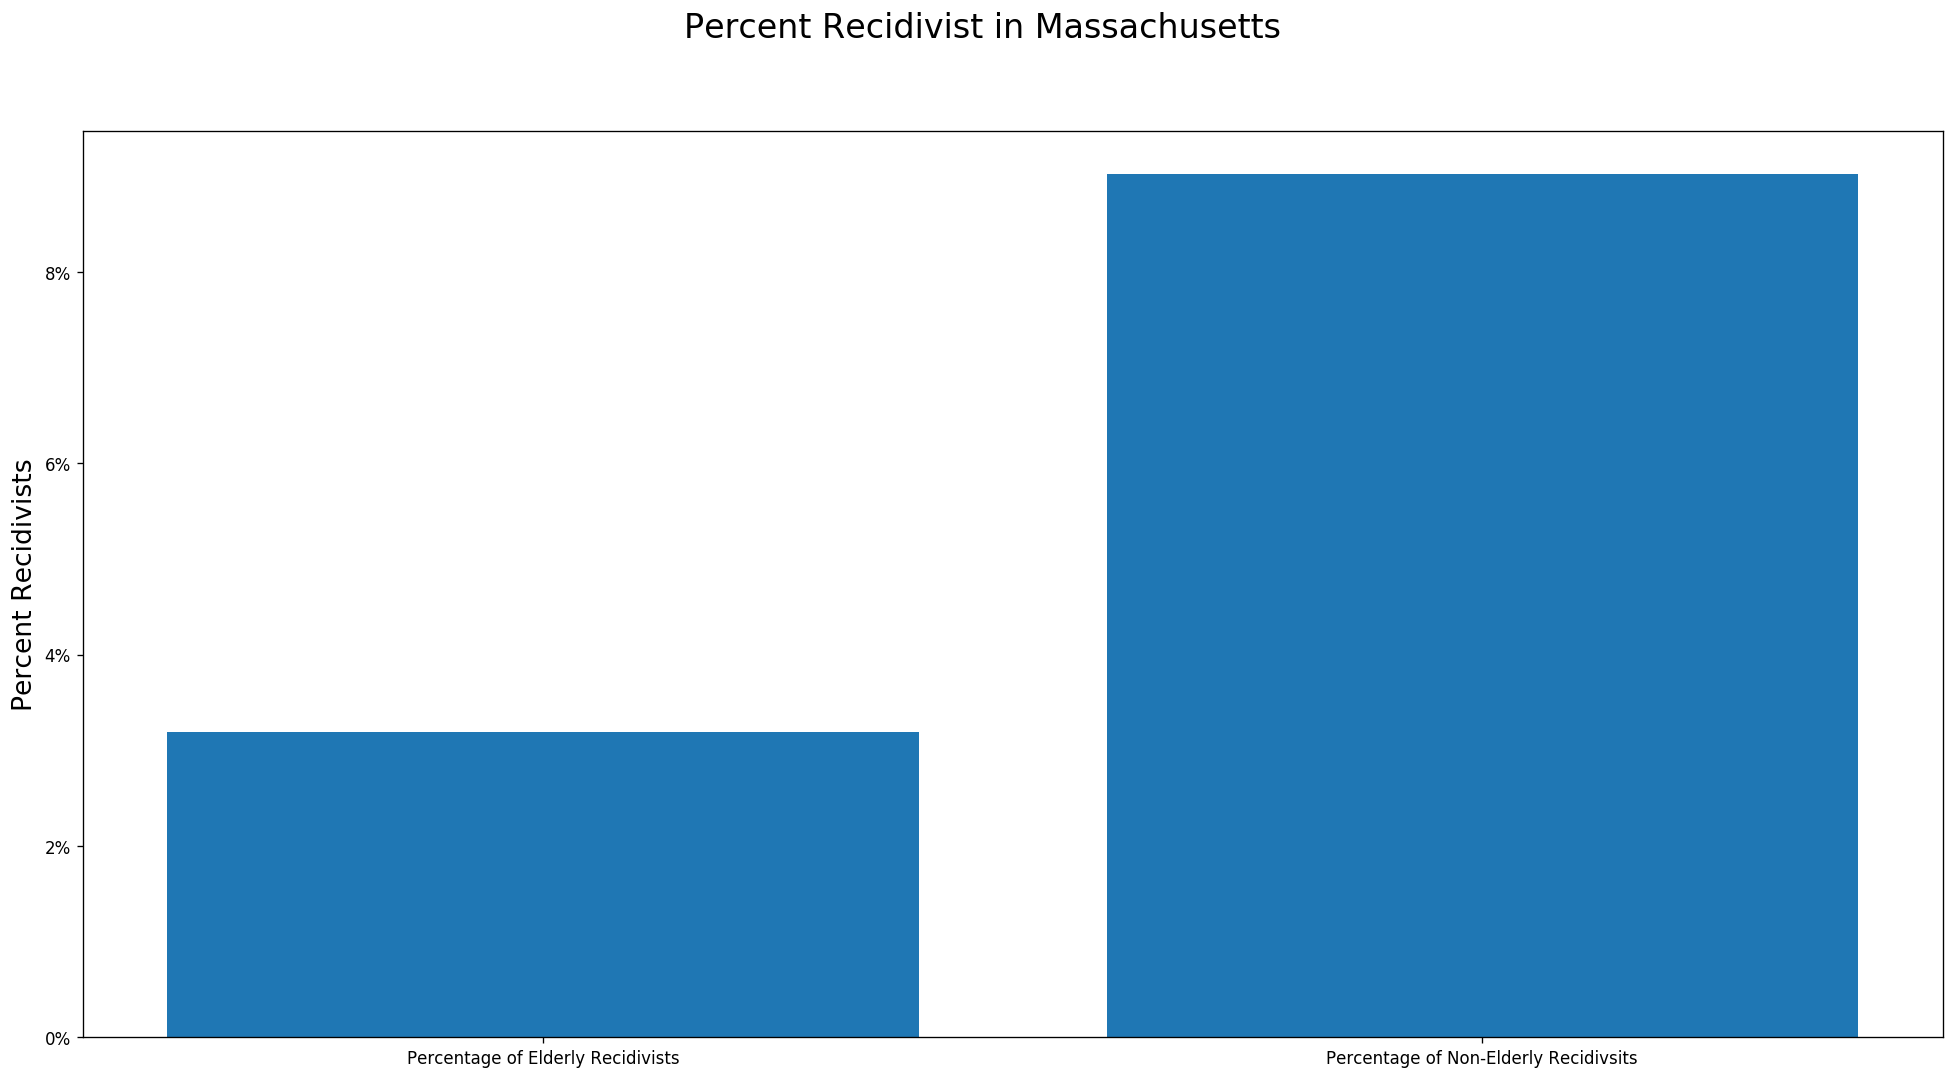

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
%matplotlib inline

values = [recidivistElderly/totalElderly, recidivistNot/totalNot]
names = ["Percentage of Elderly Recidivists", "Percentage of Non-Elderly Recidivsits"]

plt.figure(figsize=(20,10), dpi = 120)
plt.bar(np.arange(2), values)
plt.xticks(np.arange(2), names)
plt.suptitle("Percent Recidivist in Massachusetts", fontsize=20)
plt.xlabel('', fontsize=18)
plt.ylabel('Percent Recidivists', fontsize=16)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 

In [ ]:
#We want to make a table/chart where we show the crimes committed by non-eldery recidivists and elderly recidivists

In [21]:
from collections import Counter

elderlyCrime = []
elderlyOffGeneral = []
youngCrime = []
youngOffGeneral = []

isElderly = False
isNaN = False
dfcopy = df.copy()
dfcopy = dfcopy.query('STATE =="Massachusetts"')
dfcopy = dfcopy.sort_values(by=['ADMITYR'])
grouped2 = dfcopy.groupby(['ABT_INMATE_ID'])
for name, group in grouped2:
    counter+=1
    isElderly = False
    isNaN = False
    releaseages = (list(group['AGERELEASE'].values))
    crime = (list(group['OFFDETAIL'].values))
    offgeneral = (list(group['OFFGENERAL'].values))
    if releaseages[-1] == '55+ years':
        isElderly = True
    else:
        if releaseages[0] != releaseages[0]:
            isNaN = True
            continue
    if(group['SEX'].count() > 1):
        if isElderly:
            if releaseages[-2] == '55+ years':
                elderlyCrime.append(crime[-1])
                elderlyOffGeneral.append(offgeneral[-1])
                if releaseages[1] != '55+ years':
                    youngCrime.append(crime[-1])
                    youngOffGeneral.append(offgeneral[-1])

        else:
            if isNaN:
                continue
            else:
                youngCrime.append(crime[-1])
                youngOffGeneral.append(offgeneral[-1])


                
#include table in the report
#We will do top 3
print(Counter(elderlyCrime), "\n")
print(len(elderlyCrime), "\n")
print(Counter(elderlyOffGeneral), "\n")
print(len(elderlyOffGeneral), "\n")
print(Counter(youngCrime), "\n")
print(len(youngCrime), "\n")
print(Counter(youngOffGeneral), "\n")
print(len(youngOffGeneral), "\n")

Counter({'Drugs (includes possession, distribution, trafficking, other)': 9, 'Public order': 8, 'Murder (including non-negligent manslaughter)': 3, 'Burglary': 3, 'Larceny': 3, 'Robbery': 2, 'Rape/sexual assault': 2, 'Aggravated or simple assault': 2, 'Motor vehicle theft': 1, 'Missing': 1}) 

34 

Counter({'Violent': 9, 'Drugs': 9, 'Public order': 8, 'Property': 7, 'Missing': 1}) 

34 

Counter({'Drugs (includes possession, distribution, trafficking, other)': 364, 'Robbery': 249, 'Aggravated or simple assault': 155, 'Public order': 147, 'Larceny': 125, 'Burglary': 102, 'Murder (including non-negligent manslaughter)': 68, 'Other property offenses': 33, 'Fraud': 24, 'Motor vehicle theft': 20, 'Missing': 18, 'Rape/sexual assault': 12, 'Other/unspecified': 10, 'Other violent offenses': 3, 'Negligent manslaughter': 1}) 

1331 

Counter({'Violent': 488, 'Drugs': 364, 'Property': 304, 'Public order': 147, 'Missing': 18, 'Other/unspecified': 10}) 

1331 

